In [81]:
from llm_from_scratch.transformer.utils import sinusoidal_position_encoding

In [82]:
d_model = 128
sequence_length = 100
pe = sinusoidal_position_encoding(d_model=d_model, sequence_length=sequence_length)[0]

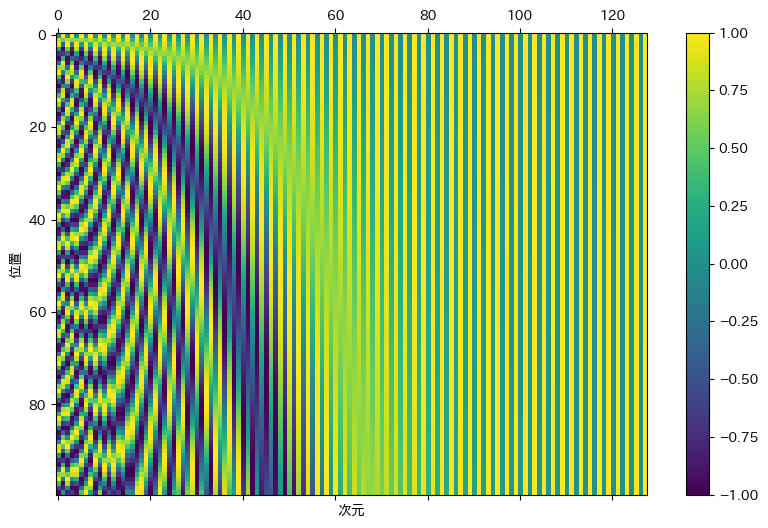

In [98]:
import matplotlib.pyplot as plt
import japanize_matplotlib

fig, ax = plt.subplots(figsize=(10, 6))
cax = ax.matshow(pe, cmap="viridis")
fig.colorbar(cax)
ax.set_xlabel("次元")
ax.set_ylabel("位置")
plt.show()

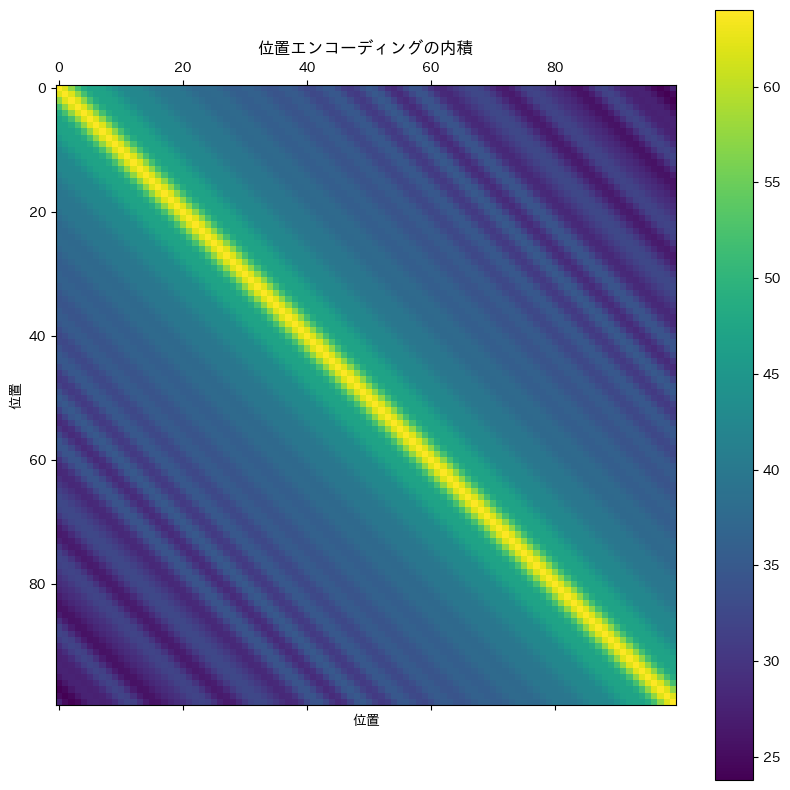

In [100]:
import torch

dotprod = torch.matmul(pe, pe.transpose(0, 1))

fig, ax = plt.subplots(figsize=(10, 10))

cax = ax.matshow(dotprod, cmap="viridis")
fig.colorbar(cax)
ax.set_title("位置エンコーディングの内積")
ax.set_xlabel("位置")
ax.set_ylabel("位置")

plt.show()

In [101]:
import numpy as np


dots = np.zeros(sequence_length)
for pos in range(sequence_length):
    total = 0
    for d in range(d_model // 2):
        total += np.cos(pos/(10000**(2*d/d_model)))
    dots[pos] = total

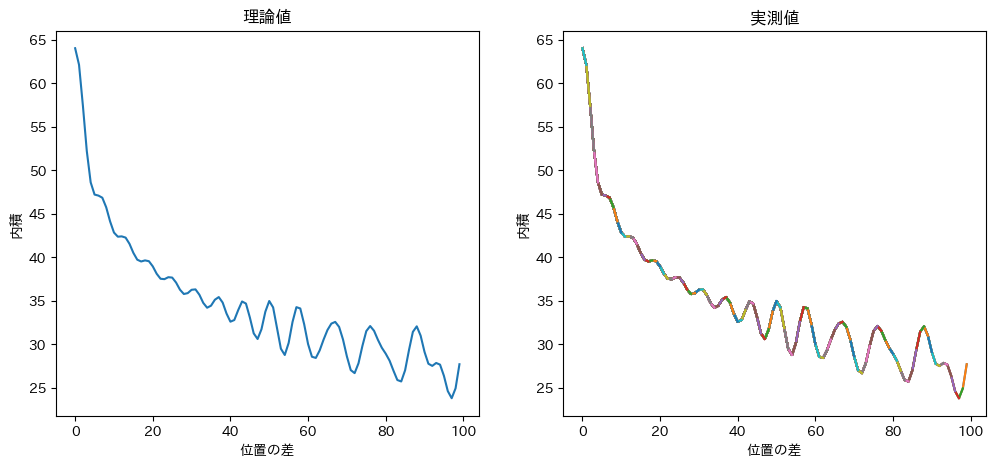

In [106]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].plot(dots)
ax[1].plot(dots)
for i in range(sequence_length):
    ax[1].plot(dotprod[i, i:])
ax[0].set_xlabel("位置の差")
ax[1].set_xlabel("位置の差")
ax[0].set_title("理論値")
ax[1].set_title("実測値")
ax[0].set_ylabel("内積")
ax[1].set_ylabel("内積")
plt.show()